In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/DOGE-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,0.002304,0.002413,0.002283,0.002368,0.002368,89023414
1,2020-01-28,0.002365,0.002450,0.002363,0.002450,0.002450,91528771
2,2020-01-29,0.002451,0.002471,0.002390,0.002390,0.002390,80676219
3,2020-01-30,0.002391,0.002446,0.002371,0.002440,0.002440,83967914
4,2020-01-31,0.002440,0.002458,0.002369,0.002394,0.002394,76519295


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,0.092872,0.093005,0.087288,0.090258,0.090258,749817261
1051,2022-12-13,0.090255,0.094380,0.087718,0.090940,0.090940,766352149
1052,2022-12-14,0.090958,0.092240,0.088244,0.088514,0.088514,549320298
1053,2022-12-15,0.088508,0.088762,0.084419,0.084722,0.084722,412364377
1054,2022-12-16,0.084722,0.086731,0.075388,0.075942,0.075942,699338853


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,0.104463,0.110604,0.098549,0.104551,0.104551,1.772717e+09
std,0.113020,0.122466,0.103808,0.113067,0.113067,4.492730e+09
min,0.001540,0.001612,0.001247,0.001537,0.001537,2.275453e+07
25%,0.003234,0.003308,0.003171,0.003237,0.003237,1.738961e+08
50%,0.067268,0.069489,0.065384,0.067357,0.067357,5.371709e+08
75%,0.169283,0.174084,0.161529,0.169251,0.169251,1.478679e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


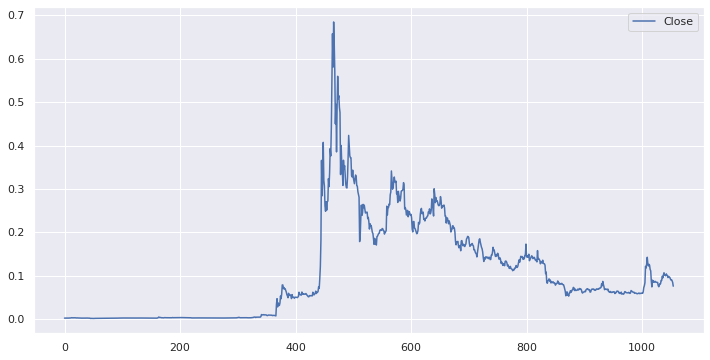

In [6]:
df[['Close']].plot(figsize=(12,6));


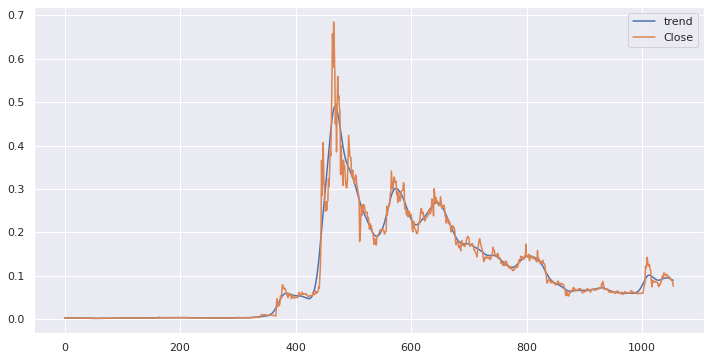

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-2.439715018705772,
 0.1308393632720819,
 19,
 1035,
 {'1%': -3.4366839058058387,
  '5%': -2.8643365489845647,
  '10%': -2.5682589990431515},
 -5721.09456988131)

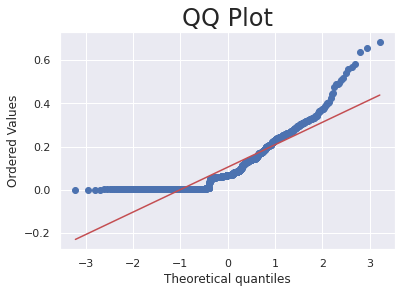

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


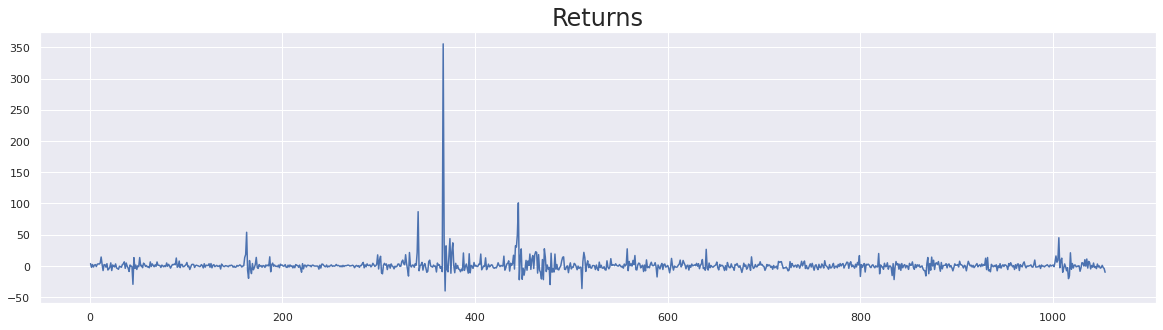

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


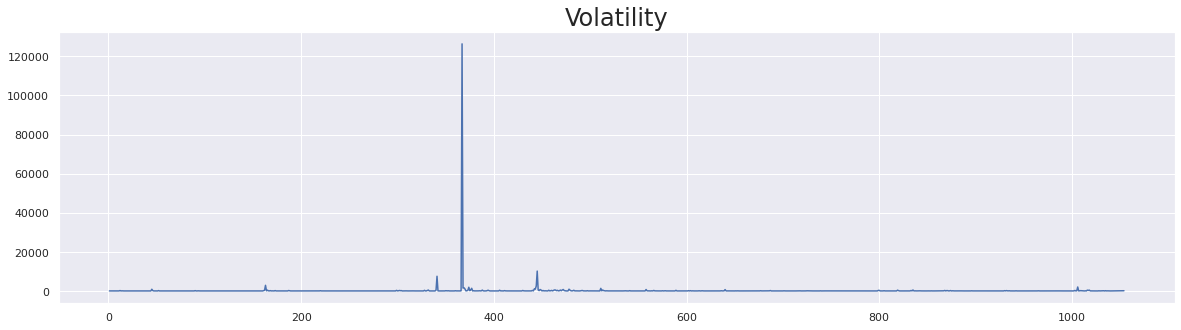

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

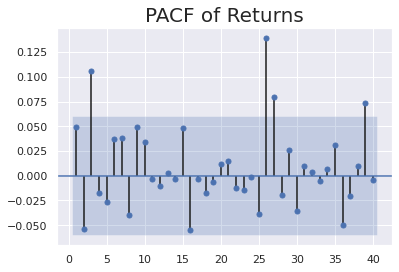

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

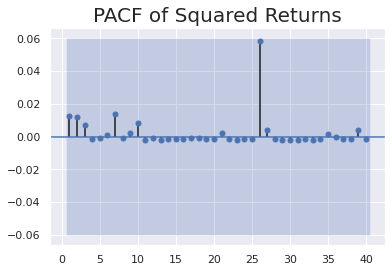

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 12.9 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5907.028966430184
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3874.539704540564
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3874.5515835294564
Iteration:      4,   Func. Count:     21,   Neg. LLF: 3874.530826206018
Iteration:      5,   Func. Count:     25,   Neg. LLF: 3874.5284274725823
Iteration:      6,   Func. Count:     28,   Neg. LLF: 3874.528431717416
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3874.5284274725823
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3874.53
Distribution:                  Normal   AIC:                           7755.06
Method:            Maximum Likelihood   BIC:                           7769.94
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9217      1.040      1.847  6.472e-02 [ -0.117,  3.961]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         29.7753      5.427      5.487  4.099e-08   [ 19.139, 40.412]
alpha[1]       1.0000      0.473      2.116  3.435e-02 [7.371e-02,  1.926]
==========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     29,   Neg. LLF: 3939.9909876738684
Iteration:     10,   Func. Count:     58,   Neg. LLF: 4055.855727977166
Iteration:     15,   Func. Count:     84,   Neg. LLF: 3874.5284280052247
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3874.5284276636594
            Iterations: 16
            Function evaluations: 90
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3874.53
Distribution:                  Normal   AIC:                           7757.06
Method:            Maximum Likelihood   BIC:                           7776.90
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9216      1.036      1.855  6.358e-02 [ -0.109,  3.952]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         29.7773      5.847      5.093  3.531e-07      [ 18.317, 41.237]
alpha[1]       1.0000      0.471      2.121  3.391e-02    [7.601e-02,  1.924]
alpha[2]   8.3330e-10  9.845e-03  8.464e-08      1.000 [-1.930e-02,1.930e-02]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 4021.749959870235
Iteration:     10,   Func. Count:     66,   Neg. LLF: 93894.52144245579
Iteration:     15,   Func. Count:    101,   Neg. LLF: 3901.958345007057
Iteration:     20,   Func. Count:    132,   Neg. LLF: 3874.5284304523384
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3874.5284270944812
            Iterations: 22
            Function evaluations: 144
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3874.53
Distribution:                  Normal   AIC:                           7759.06
Method:            Maximum Likelihood   BIC:                           7783.86
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9217      1.069      1.797  7.229e-02 [ -0.174,  4.017]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         29.7772      5.850      5.090  3.577e-07      [ 18.311, 41.243]
alpha[1]       1.0000      0.460      2.176  2.959e-02    [9.911e-02,  1.901]
alpha[2]   1.5039e-10  1.290e-02  1.166e-08      1.000 [-2.528e-02,2.528e-02]
alpha[3]   1.2032e-11  3.944e-02  3.050e-10      1.000 [-7.731e-02,7.731e-02]
=============================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     84,   Neg. LLF: 4084.47923242969
Iteration:     10,   Func. Count:    168,   Neg. LLF: 135316.27525482315
Iteration:     15,   Func. Count:    261,   Neg. LLF: 8541.376496388679
Iteration:     20,   Func. Count:    346,   Neg. LLF: 7689.4267335619625
Iteration:     25,   Func. Count:    431,   Neg. LLF: 3933.3851069578564
Iteration:     30,   Func. Count:    521,   Neg. LLF: 3870.4729790751653
Iteration:     35,   Func. Count:    604,   Neg. LLF: 3869.771400138636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3869.768922807653
            Iterations: 40
            Function evaluations: 678
            Gradient evaluations: 39


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3869.77
Distribution:                  Normal   AIC:                           7769.54
Method:            Maximum Likelihood   BIC:                           7843.94
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9127      1.100      1.738  8.214e-02 [ -0.244,  4.069]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         27.9817      6.523      4.290  1.790e-05      [ 15.197, 40.767]
alpha[1]       0.9769      0.451      2.166  3.031e-02    [9.291e-02,  1.861]
alpha[2]   1.8023e-09  1.151e-02  1.565e-07      1.000 [-2.257e-02,2.257e-02]
alpha[3]   3.0299e-10  5.005e-02  6.053e-09      1.000 [-9.811e-02,9.811e-02]
alpha[4]       0.0000  3.311e-02      0.000      1.000 [-6.489e-02,6.489e-02]
alpha[5]   4.9892e-05  1.165e-03  4.282e-02      0.966 [-2.234e-03,2.333e-03]
alpha[6]   3.2887e-06  1.648e-03  1.996e-03      0.998 [-3.226e-03,3.233e-03]
alpha[7]       0.0199  3.418e-02      0.582      0.561 [-4.711e-02,8.687e-02]
alpha[8]   5.1536e-12  6.201e-03  8.311e-10      1.000 [-1.215e-02,1.215e-02]
alpha[9]   1.6068e-04  1.453e-03      0.111      0.912 [-2.688e-03,3.009e-03]
alpha[10]  7.2662e-04  3.194e-03      0.227      0.820 [-5.534e-03,6.987e-03]
alpha[11]      0.0000  7.774e-03      0.000      1.000 [-1.524e-02,1.524e-02]
alpha[12]  2.2613e-03  2.721e-03      0.831      0.406 [-3.071e-03,7.594e-03]
alpha[13]      0.0000  2.128e-03      0.000      1.000 [-4.172e-03,4.172e-03]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 5615.22961710888
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4057.120960071128
Iteration:     15,   Func. Count:    109,   Neg. LLF: 4369.560024581153
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3966.2102077845466
            Iterations: 20
            Function evaluations: 116
            Gradient evaluations: 16


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3966.21
Distribution:                  Normal   AIC:                           7940.42
Method:            Maximum Likelihood   BIC:                           7960.26
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0857      0.271     -0.317      0.751 [ -0.616,  0.445]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.7484      1.463      0.512      0.609     [ -2.118,  3.615]
alpha[1]       0.0486  1.514e-02      3.211  1.321e-03 [1.895e-02,7.829e-02]
beta[1]        0.9514  2.449e-02     38.843      0.000     [  0.903,  0.999]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3970.872988112492
Iteration:     10,   Func. Count:     73,   Neg. LLF: 4332.938727759766
Iteration:     15,   Func. Count:    113,   Neg. LLF: 3945.6861231807898
Iteration:     20,   Func. Count:    154,   Neg. LLF: 3942.2009440129923
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3942.590664596016
            Iterations: 26
            Function evaluations: 173
            Gradient evaluations: 22


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3942.59
Distribution:                  Normal   AIC:                           7895.18
Method:            Maximum Likelihood   BIC:                           7919.98
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0400      0.318      0.126      0.900 [ -0.583,  0.663]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0760      2.498      0.431      0.667    [ -3.821,  5.973]
alpha[1]       0.0892  2.041e-02      4.370  1.242e-05  [4.919e-02,  0.129]
beta[1]        0.1698      0.119      1.424      0.155 [-6.398e-02,  0.404]
beta[2]        0.7410  6.646e-02     11.150  7.148e-29    [  0.611,  0.871]
===========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 5453.135073615735
Iteration:     10,   Func. Count:     82,   Neg. LLF: 4246.003912226726
Iteration:     15,   Func. Count:    123,   Neg. LLF: 3923.952205086346


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     20,   Func. Count:    166,   Neg. LLF: 3923.735510429391
Iteration:     25,   Func. Count:    242,   Neg. LLF: 3926.401236626146
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3923.715716353226
            Iterations: 30
            Function evaluations: 251
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3923.72
Distribution:                  Normal   AIC:                           7859.43
Method:            Maximum Likelihood   BIC:                           7889.19
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0253      0.268  9.467e-02      0.925 [ -0.499,  0.550]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.4355      2.933      0.489      0.625      [ -4.314,  7.185]
alpha[1]       0.1320  2.973e-02      4.440  9.004e-06    [7.373e-02,  0.190]
beta[1]    1.8746e-06  1.322e-02  1.418e-04      1.000 [-2.592e-02,2.592e-02]
beta[2]        0.2622  5.757e-02      4.555  5.246e-06      [  0.149,  0.375]
beta[3]        0.6058  1.441e-02     42.046      0.000      [  0.578,  0.634]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 4344.440409203668
Iteration:     10,   Func. Count:     74,   Neg. LLF: 4046.3981827399775
Iteration:     15,   Func. Count:    139,   Neg. LLF: 3963.199336008105
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3966.1901672168524
            Iterations: 22
            Function evaluations: 172
            Gradient evaluations: 18


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3966.19
Distribution:                  Normal   AIC:                           7942.38
Method:            Maximum Likelihood   BIC:                           7967.18
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0867      0.276     -0.314      0.754 [ -0.628,  0.455]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7427      1.394      0.533      0.594    [ -1.989,  3.475]
alpha[1]       0.0486  6.422e-02      0.757      0.449 [-7.728e-02,  0.174]
alpha[2]   8.4782e-06  6.424e-02  1.320e-04      1.000    [ -0.126,  0.126]
beta[1]        0.9514  2.335e-02     40.751      0.000    [  0.906,  0.997]
===========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 5827.831278795045
Iteration:     10,   Func. Count:     80,   Neg. LLF: 3966.42744161883
Iteration:     15,   Func. Count:    129,   Neg. LLF: 3965.9660798784644
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 3965.966164901548
            Iterations: 19
            Function evaluations: 129
            Gradient evaluations: 15


/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3965.97
Distribution:                  Normal   AIC:                           7943.93
Method:            Maximum Likelihood   BIC:                           7973.69
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0783      0.353     -0.222      0.824 [ -0.770,  0.614]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7479      1.683      0.444      0.657    [ -2.552,  4.047]
alpha[1]       0.0486  6.802e-02      0.715      0.475 [-8.469e-02,  0.182]
alpha[2]   1.3867e-05      0.159  8.715e-05      1.000    [ -0.312,  0.312]
alpha[3]   1.3742e-05      0.112  1.232e-04      1.000    [ -0.219,  0.219]
beta[1]        0.9514  2.679e-02     35.508 3.741e-276    [  0.899,  1.004]
===========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: 3921.5168625419565
Iteration:     10,   Func. Count:     88,   Neg. LLF: 3883.5455199823396
Iteration:     15,   Func. Count:    117,   Neg. LLF: 3883.5284037326805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3883.5284037165447
            Iterations: 15
            Function evaluations: 117
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3883.53
Distribution:                  Normal   AIC:                           7777.06
Method:            Maximum Likelihood   BIC:                           7801.86
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8919      0.293      3.048  2.301e-03 [  0.318,  1.465]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0852  2.234e-02      3.811  1.385e-04 [4.136e-02,  0.129]
alpha[1]       0.1103  3.867e-02      2.853  4.326e-03 [3.454e-02,  0.186]
gamma[1]       0.1954  6.464e-02      3.023  2.503e-03 [6.871e-02,  0.322]
beta[1]        0.9917  3.982e-03    249.057      0.000   [  0.984,  1.000]
==========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3801.17
Distribution:                  Normal   AIC:                           7612.34
Method:            Maximum Likelihood   BIC:                           7637.14
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0826      0.211      0.391      0.696 [ -0.331,  0.496]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3845      0.450      0.854      0.393    [ -0.498,  1.267]
alpha[1]       0.1072  2.616e-02      4.097  4.187e-05  [5.590e-02,  0.158]
gamma[1]      -0.1072  3.500e-02     -3.062  2.197e-03 [ -0.176,-3.857e-02]
beta[1]        0.9464  1.640e-02     57.706      0.000    [  0.914,  0.979]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 790741.926524875
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3659.190817551338
Iteration:     15,   Func. Count:     98,   Neg. LLF: 3658.9369720545883
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3658.936859835313
            Iterations: 17
            Function evaluations: 113
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -3658.94
Distribution:                  Normal   AIC:                           7327.87
Method:            Maximum Likelihood   BIC:                           7352.68
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1209  1.123e-03    107.659      0.000 [  0.119,  0.123]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.9469      0.518      7.614  2.649e-14      [  2.931,  4.963]
alpha[1]       0.5074  8.774e-02      5.783  7.326e-09      [  0.335,  0.679]
gamma[1]       0.9852      0.631      1.560      0.119      [ -0.252,  2.223]
beta[1]    2.5631e-10  3.102e-02  8.262e-09      1.000 [-6.080e-02,6.080e-02]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 3877.5259422265854
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3874.2463290469714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3874.2462339856293
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -3874.25
Distribution:                  Normal   AIC:                           7758.49
Method:            Maximum Likelihood   BIC:                           7783.29
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9237      1.594      1.207      0.227 [ -1.200,  5.048]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         29.2840     15.312      1.913  5.581e-02 [ -0.726, 59.294]
phi        4.6865e-03      0.258  1.817e-02      0.986 [ -0.501,  0.510]
d              0.9906  3.229e-02     30.682 9.862e-207 [  0.927,  1.054]
beta       6.7448e-14      0.262  2.572e-13      1.000 [ -0.514,  0.514]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     24,   Neg. LLF: 3874.5301016984586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3874.5284276735333
            Iterations: 8
            Function evaluations: 36
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -3874.53
Distribution:                  Normal   AIC:                           7755.06
Method:            Maximum Likelihood   BIC:                           7769.94
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9217      1.040      1.847  6.473e-02 [ -0.117,  3.961]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         29.7774      5.428      5.486  4.114e-08   [ 19.139, 40.416]
alpha[1]       1.0000      0.473      2.116  3.435e-02 [7.371e-02,  1.926]
==========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 19080.41998903768
Iteration:     10,   Func. Count:     81,   Neg. LLF: 4221.131841541523
Iteration:     15,   Func. Count:    120,   Neg. LLF: 3711.98998693012
Iteration:     20,   Func. Count:    155,   Neg. LLF: 3711.2270241238557
Iteration:     25,   Func. Count:    190,   Neg. LLF: 3711.0684290570034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3711.0684143813633
            Iterations: 27
            Function evaluations: 203
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -3711.07
Distribution:                  Normal   AIC:                           7434.14
Method:            Maximum Likelihood   BIC:                           7463.90
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:37:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3279      0.283      1.161      0.246 [ -0.226,  0.882]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         11.4777     55.256      0.208      0.835  [-96.822,1.198e+02]
alpha[1]       0.0386  6.821e-02      0.566      0.572 [-9.510e-02,  0.172]
gamma[1]      -0.3542      0.123     -2.868  4.133e-03    [ -0.596, -0.112]
beta[1]        0.8760  4.642e-02     18.871  1.986e-79    [  0.785,  0.967]
delta          4.0000      2.032      1.968  4.905e-02  [1.668e-02,  7.983]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=578.7334932605595, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

578.7334932605595

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1        3.462838
2       -2.448980
3        2.092050
4       -1.885246
5        1.169591
          ...    
1050    -2.817766
1051     0.755612
1052    -2.667693
1053    -4.284068
1054   -10.363306
Name: returns, Length: 1054, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=7853632.297328099, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

7853632.297328099

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

423.51878922857804

coef. asimetria

In [53]:
returns.skew()

17.071791123877084

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.045
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -16.201
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -17.111
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.315
P-value                         0.123
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/DOGE-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,0.002304,0.002413,0.002283,0.002368,0.002368,89023414
1,2020-01-28,0.002365,0.002450,0.002363,0.002450,0.002450,91528771
2,2020-01-29,0.002451,0.002471,0.002390,0.002390,0.002390,80676219
3,2020-01-30,0.002391,0.002446,0.002371,0.002440,0.002440,83967914
4,2020-01-31,0.002440,0.002458,0.002369,0.002394,0.002394,76519295
...,...,...,...,...,...,...,...
1050,2022-12-12,0.092872,0.093005,0.087288,0.090258,0.090258,749817261
1051,2022-12-13,0.090255,0.094380,0.087718,0.090940,0.090940,766352149
1052,2022-12-14,0.090958,0.092240,0.088244,0.088514,0.088514,549320298
1053,2022-12-15,0.088508,0.088762,0.084419,0.084722,0.084722,412364377


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,0.002368,89023414
1,2020-01-28,0.002450,91528771
2,2020-01-29,0.002390,80676219
3,2020-01-30,0.002440,83967914
4,2020-01-31,0.002394,76519295
...,...,...,...
1050,2022-12-12,0.090258,749817261
1051,2022-12-13,0.090940,766352149
1052,2022-12-14,0.088514,549320298
1053,2022-12-15,0.084722,412364377


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,0.002368,89023414,0.002450
1,2020-01-28,0.002450,91528771,0.002390
2,2020-01-29,0.002390,80676219,0.002440
3,2020-01-30,0.002440,83967914,0.002394
4,2020-01-31,0.002394,76519295,0.002422
...,...,...,...,...
1050,2022-12-12,0.090258,749817261,0.090940
1051,2022-12-13,0.090940,766352149,0.088514
1052,2022-12-14,0.088514,549320298,0.084722
1053,2022-12-15,0.084722,412364377,0.075942


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,0.002368,89023414,0.002450
1,2020-01-28,0.002450,91528771,0.002390
2,2020-01-29,0.002390,80676219,0.002440
3,2020-01-30,0.002440,83967914,0.002394
4,2020-01-31,0.002394,76519295,0.002422
...,...,...,...,...
1049,2022-12-11,0.092875,300470314,0.090258
1050,2022-12-12,0.090258,749817261,0.090940
1051,2022-12-13,0.090940,766352149,0.088514
1052,2022-12-14,0.088514,549320298,0.084722


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.00121626, 0.00095505, 0.00133628],
       [0.00133628, 0.00099116, 0.00124846],
       [0.00124846, 0.00083475, 0.00132164],
       ...,
       [0.13085153, 0.01071653, 0.1273008 ],
       [0.1273008 , 0.00758872, 0.12175078],
       [0.12175078, 0.00561495, 0.10890024]])

In [73]:
price_volume_target_scaled_df.shape

(1054, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [78]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

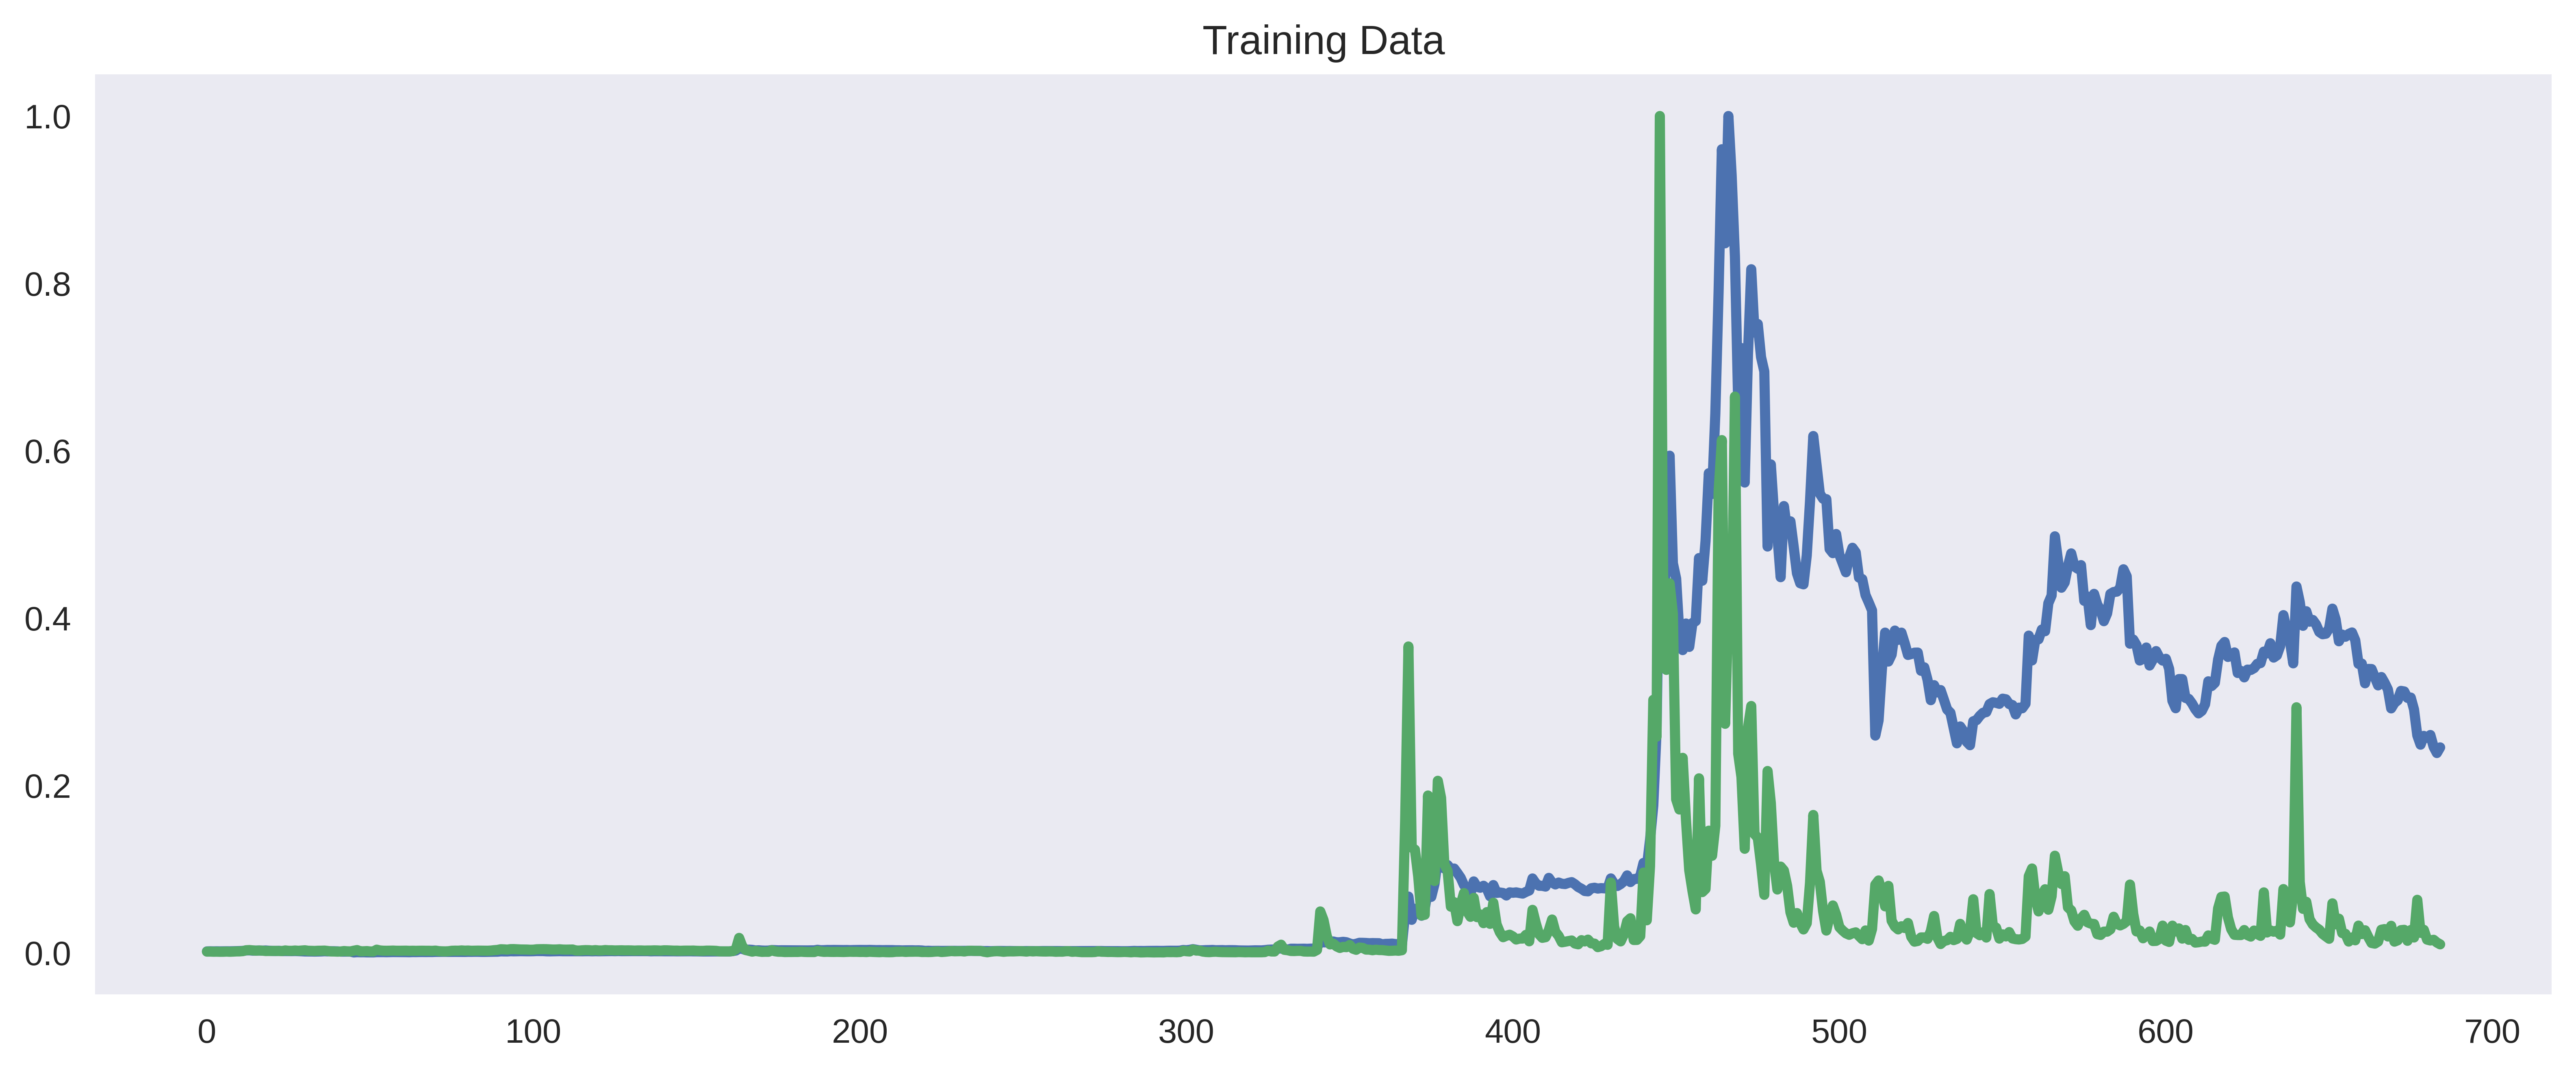

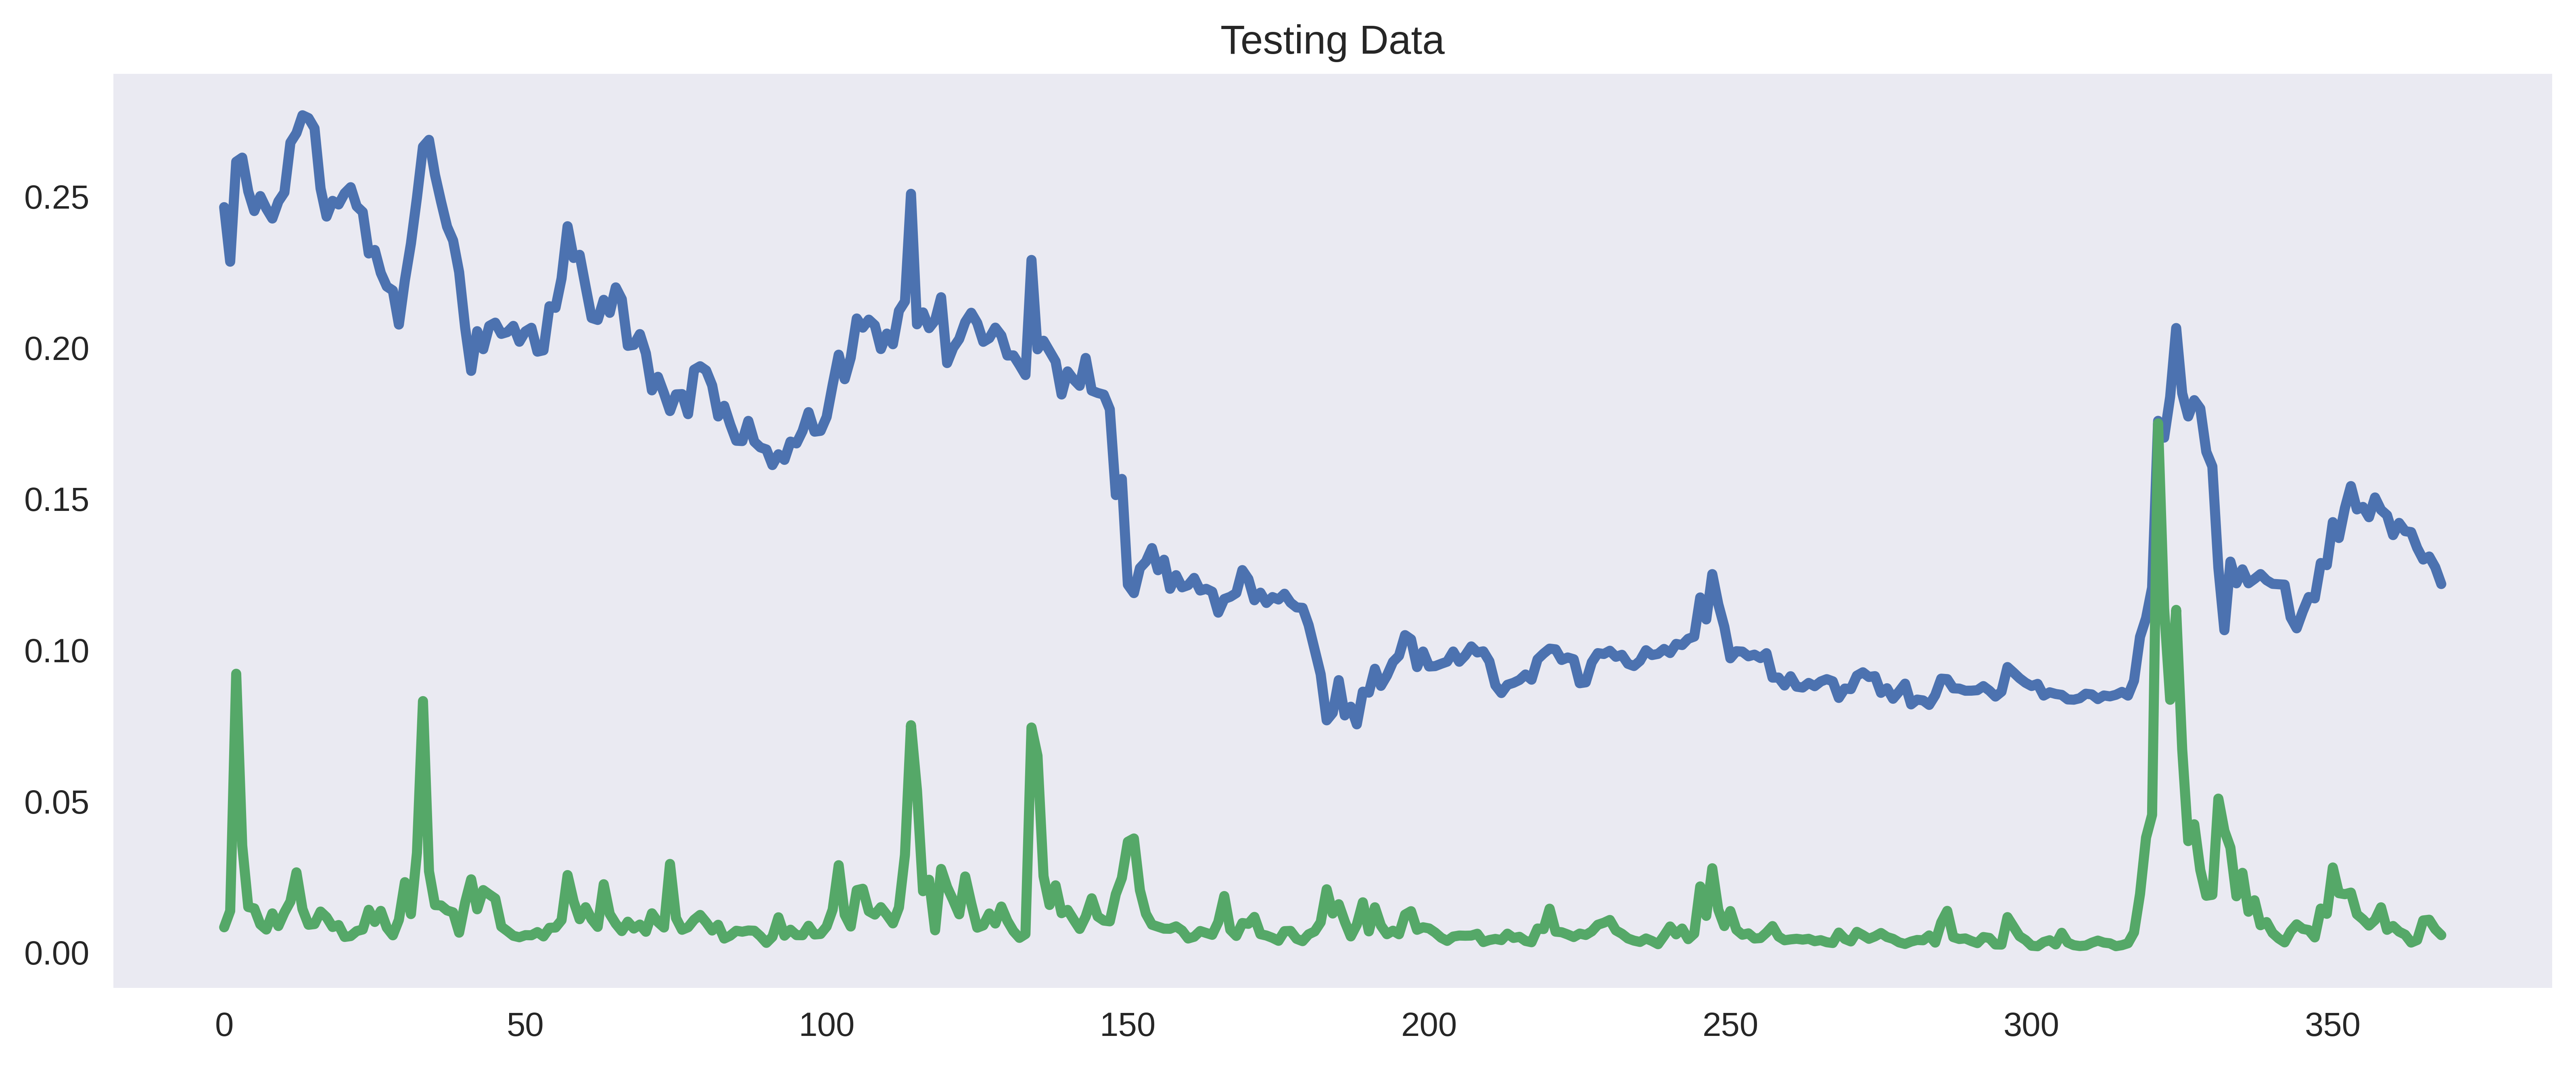

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9745802411328749


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.00838108],
       [0.0084961 ],
       [0.00840711],
       ...,
       [0.13153424],
       [0.12805482],
       [0.12272452]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1054

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.001216
1,2020-01-28,0.001336
2,2020-01-29,0.001248
3,2020-01-30,0.001322
4,2020-01-31,0.001254
...,...,...
1049,2022-12-11,0.133684
1050,2022-12-12,0.129853
1051,2022-12-13,0.130852
1052,2022-12-14,0.127301


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.001216,0.008381
1,2020-01-28,0.001336,0.008496
2,2020-01-29,0.001248,0.008407
3,2020-01-30,0.001322,0.008478
4,2020-01-31,0.001254,0.008410
...,...,...,...
1049,2022-12-11,0.133684,0.133967
1050,2022-12-12,0.129853,0.130580
1051,2022-12-13,0.130852,0.131534
1052,2022-12-14,0.127301,0.128055


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,0.002368,89023414,0.002450
1,2020-01-28,0.002450,91528771,0.002390
2,2020-01-29,0.002390,80676219,0.002440
3,2020-01-30,0.002440,83967914,0.002394
4,2020-01-31,0.002394,76519295,0.002422
...,...,...,...,...
1050,2022-12-12,0.090258,749817261,0.090940
1051,2022-12-13,0.090940,766352149,0.088514
1052,2022-12-14,0.088514,549320298,0.084722
1053,2022-12-15,0.084722,412364377,0.075942


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,0.002368,89023414,0.002450
1,2020-01-28,0.002450,91528771,0.002390
2,2020-01-29,0.002390,80676219,0.002440
3,2020-01-30,0.002440,83967914,0.002394
4,2020-01-31,0.002394,76519295,0.002422
...,...,...,...,...
1050,2022-12-12,0.090258,749817261,0.090940
1051,2022-12-13,0.090940,766352149,0.088514
1052,2022-12-14,0.088514,549320298,0.084722
1053,2022-12-15,0.084722,412364377,0.075942


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.36800000e-03, 8.90234140e+07],
       [2.45000000e-03, 9.15287710e+07],
       [2.39000000e-03, 8.06762190e+07],
       ...,
       [8.85140000e-02, 5.49320298e+08],
       [8.47220000e-02, 4.12364377e+08],
       [7.59420000e-02, 6.99338853e+08]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.00121626]),
 array([0.00133628]),
 array([0.00124846]),
 array([0.00132164]),
 array([0.00125432]),
 array([0.0012953]),
 array([0.00136263]),
 array([0.00132164]),
 array([0.00141385]),
 array([0.00152948]),
 array([0.00163339]),
 array([0.00180317]),
 array([0.00237398]),
 array([0.00248083]),
 array([0.00212078]),
 array([0.00220128]),
 array([0.00227738]),
 array([0.00217932]),
 array([0.00233154]),
 array([0.00202418]),
 array([0.00181049]),
 array([0.00171975]),
 array([0.00190563]),
 array([0.00159095]),
 array([0.00164218]),
 array([0.00162608]),
 array([0.00155729]),
 array([0.00167291]),
 array([0.00154119]),
 array([0.00137433]),
 array([0.00117382]),
 array([0.00115186]),
 array([0.00110064]),
 array([0.0010216]),
 array([0.00108015]),
 array([0.00118846]),
 array([0.001408]),
 array([0.00126017]),
 array([0.00141824]),
 array([0.00140361]),
 array([0.00127042]),
 array([0.00095135]),
 array([0.00099087]),
 array([0.00098062]),
 array([0.00094696]),
 array([0.]),


In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 12s 111ms/step - loss: 0.0431 - val_loss: 0.0203
Epoch 2/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0259 - val_loss: 0.0116
Epoch 3/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 3.5523e-04
Epoch 4/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 6.1792e-04
Epoch 5/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 2.3567e-04
Epoch 6/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 3.9444e-04
Epoch 7/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0013 - val_loss: 5.4101e-04
Epoch 8/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 2.2567e-04
Epoch 9/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 4.1030e-04
Epoch 10/20
19/19 [==============================] - 0s 15ms/step - loss: 0.001

In [102]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 1s 5ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.00096047204,
 0.0010885494,
 0.0009948323,
 0.0010729311,
 0.0010010824,
 0.0010448182,
 0.0011166651,
 0.0010729311,
 0.0011713356,
 0.0012947209,
 0.0014056191,
 0.0015867986,
 0.0021959124,
 0.0023099212,
 0.001925719,
 0.0020116186,
 0.0020928327,
 0.001988192,
 0.0021506185,
 0.0018226374,
 0.0015946077,
 0.0014977744,
 0.0016961237,
 0.0013603279,
 0.0014149928,
 0.0013978109,
 0.0013243956,
 0.0014477875,
 0.0013072202,
 0.0011291597,
 0.00091517065,
 0.0008917451,
 0.00083707925,
 0.0007527303,
 0.00081521086,
 0.0009307908,
 0.0011650836,
 0.0010073287,
 0.0011760173,
 0.0011603953,
 0.0010182634,
 0.00067775697,
 0.0007199319,
 0.00070899725,
 0.00067307055,
 -0.00033756718,
 -2.35904e-05,
 -0.00013605878,
 -0.00010637846,
 -0.00025946274,
 -0.00025946274,
 -0.0002922658,
 3.108289e-05,
 3.108289e-05,
 4.982855e-05,
 -3.4522265e-05,
 8.106604e-05,
 0.00015292037,
 0.00012636371,
 0.00013886299,
 8.418877e-05,
 3.889203e-05,
 -4.7019683e-05,
 0.00012168009,
 9.044167e-05,
 

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.000960
2,2020-01-29,0.001089
3,2020-01-30,0.000995
4,2020-01-31,0.001073
5,2020-02-01,0.001001
...,...,...
1050,2022-12-12,0.141487
1051,2022-12-13,0.137450
1052,2022-12-14,0.138502
1053,2022-12-15,0.134758


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.000960,0.001336
2,2020-01-29,0.001089,0.001248
3,2020-01-30,0.000995,0.001322
4,2020-01-31,0.001073,0.001254
5,2020-02-01,0.001001,0.001295
...,...,...,...
1050,2022-12-12,0.141487,0.129853
1051,2022-12-13,0.137450,0.130852
1052,2022-12-14,0.138502,0.127301
1053,2022-12-15,0.134758,0.121751


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")